# 이미지 연산
- `cv2.add()`
    - 두 이미지를 밝기 기준으로 합치기함 - 예: 이미지 합성, 블렌딩, 밝기 증가
    - 채널별로 덧셈 (R, G, B 각각) . 255를 넘으면 자동으로 255로 클리핑함 (overflow 방지)


## 1. 두 영상 합성

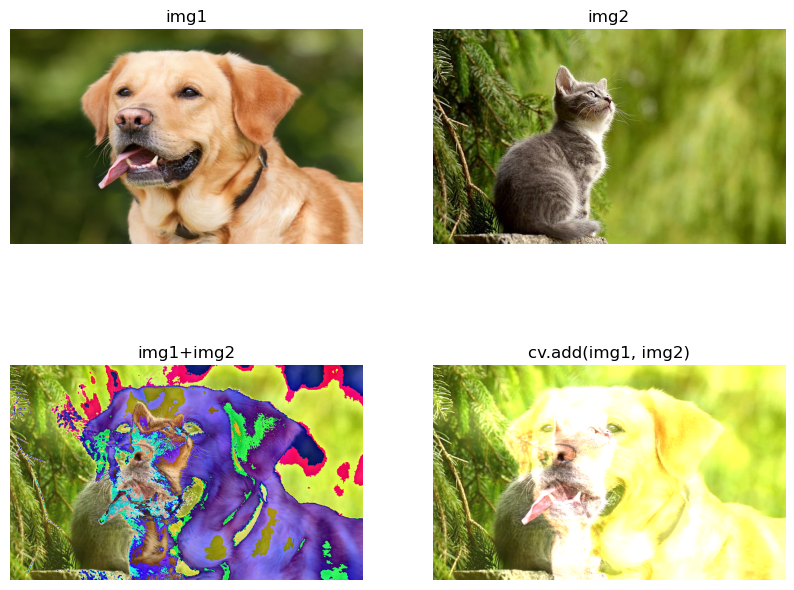

In [1]:
from IPython.core.pylabtools import figsize
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지 읽기
img1 = cv2.imread('../cv_images/dog.jpg')
img2 = cv2.imread('../cv_images/cat.jpg')

# img1의 크기를 img2와 동일하게 조정
img1_resized = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# 이미지 더하기
img3 = img1_resized + img2   # ... 코드 입력  # 더하기 연산
img4 = cv2.add(img1_resized, img2)   # ... 코드 입력  # OpenCV 함수

imgs = {'img1': img1_resized, 'img2': img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# 이미지 출력
fig = plt.figure(figsize=(10, 8))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(221+i) 
    plt.axis('off') 
    plt.imshow(v[:, :, ::-1]) 
    plt.title(k)

plt.show()

## 2.비트와이즈(bitwise) 연산
- 픽셀 단위의 특정 부분 추출, 마스킹, 영역 결합 => 물체 검출, 영역 분리, 배경 제거
    - 픽셀 값을 비트 단위로 AND, OR, XOR, NOT 연산
    - 주로 마스크 이미지(흑백)와 함께 사용

- `bitwise_and(img1, img2, mask=None)` : 각 픽셀에 대한 비트와이즈 AND 연산     
- `bitwise_or(img1, img2, mask=None)` : 각 픽셀에 대한 비트와이즈 OR 연산           
- `bitwise_xor(img1, img2, mask=None)` : 각 픽셀에 대한 비트와이즈 XOR 연산        
- `bitwise_not(img1, mask=None)` : 각 픽셀에 대한 비트와이즈 NOT 연산       

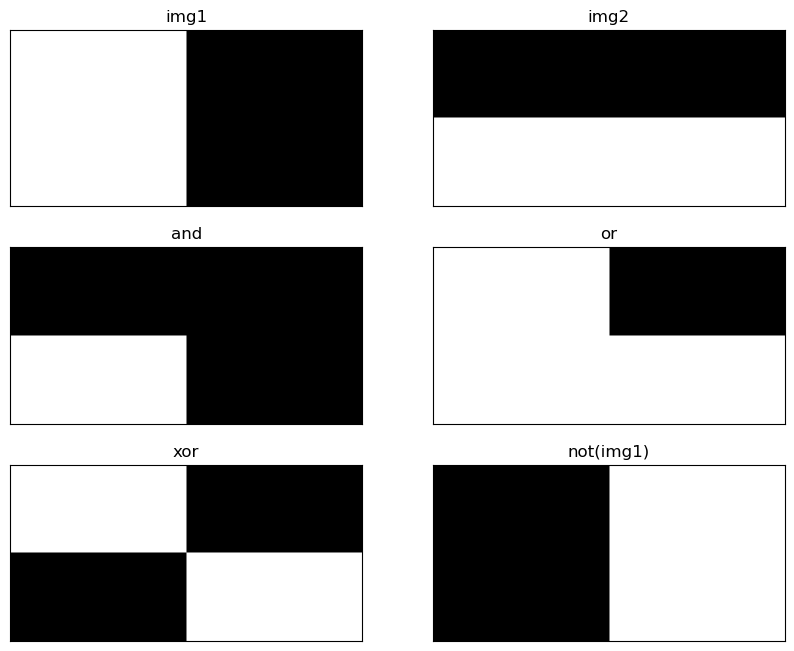

In [2]:
import numpy as np, cv2
import matplotlib.pylab as plt

# height: 200 width: 400 검정색 이미지 생성
img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8) 

# img[y슬라이싱, x슬라이싱]
img1[:, :200] = 255  # ... 코드 입력         # 왼쪽은 흰색, 오른쪽은 검정
img2[100:200, :] = 255  # ... 코드 입력      # 위쪽은 검정색, 아래쪽은 흰색

# 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)  # 비트와이즈 AND 연산
bitOr = cv2.bitwise_or(img1, img2)  # ... 코드 입력           # 비트와이즈 OR 연산
bitXor = cv2.bitwise_xor(img1, img2) # 비트와이즈 XOR 연산
bitNot = cv2.bitwise_not(img1)        # 비트와이즈 NOT 연산

# 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}

fig = plt.figure(figsize=(10, 8))

for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()